# Simulating a damped harmonic oscillator

- [Model system](#model)
    - [Time evolution equations](#eq)
- [Computer simulation](#simulation)
- [Simulation results](#results)
    - [Temporal values](#temporal)
    - [Trajectory plot](#trajectory)
- [Extra](#extra)
    - [Euler method for unharmonic oscillator](#euler_un)
    - [Runge-Kutta 2nd order harmonic oscillator](#rk2)
    - [Runge-Kutta 4th order harmonic oscillator](#rk4)
    - [Leap-Frog method for harmonic oscillator](#leapfrog)

<div id="model" />

## Model system

Consider a spring of constant $k$ with one end attached to the origin and the other end to a particle of mass $m$ immersed in a fluid. Here the friction constant between the particle and the fluid is $\zeta$, but we assume that the spring is friction free. Let $R(t)$ be the temporal position of the particle at time $t$, and $V(t)$ its velocity. There are two forces acting on the particle; the friction force exerted by the fluid and the restoring force of the spring. 

- The friction force is assumed to be proportional to the velocity of the particle and points in the opposite direction.
- The spring force is assumed to be proportional to the distance from the origin and points towards the origin. 

![](images/damped_oscillator.png) 

<div id="eq" />

### Time evolution equations

$$
\frac{d\mathbf{R}(t)}{dt} =\mathbf{V}(t)\hspace{17mm} \tag{B1}
$$

$$
m\frac{d\mathbf{V}(t)}{dt}=-\zeta\mathbf{V}(t)-k\mathbf{R}(t) \tag{B2}
$$

Then, the following two differential equations for the time evolution of the position and the velocity of the particle, must be simultaneously solved. Eq. (B1) is simply the definition of the velocity, and Eq. (B2) represents the force balance, which is known as Newton’s 2nd law of motion.

<div id="simulation" />

## Computer simulation

<div id="euler" />

### Euler method

Use Eq.(A8) in the previous notebook

$$
\mathbf{R}_{i+1}=\mathbf{R}_i+\int_{t_i}^{t_{i+1}} dt\mathbf{V}(t)\simeq\mathbf{R}_i+\mathbf{V}_i \Delta t \hspace{15mm}\tag{B3}
$$

$$
\mathbf{V}_{i+1}=\mathbf{V}_i-\frac{\zeta}{m}\int_{t_i}^{t_{i+1}} dt\mathbf{V}(t)-\frac{k}{m}\int_{t_i}^{t_{i+1}} dt\mathbf{R}(t)
$$
$$
\simeq\left(1-\frac{\zeta}{m}\Delta t\right)\mathbf{V}_i - \frac{k}{m} \mathbf{R}_i \Delta t \hspace{12mm}\tag{B4}
$$

We here use the Euler method (Eq.(A8) in the previous notebook) to numerically solve the ordinary differential equations (B1) and (B2). For a small time increment $\Delta t$, the time integrals from $t_i$ to $t_i+\Delta t$ can be approximated to first order as shown in Eqs. (B3) and (B4).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib nbagg
plt.style.use("ggplot")

def init(): # initialize animation
    particles.set_data([], [])
    line.set_data([], [])
    title.set_text(r'')
    return particles,line,title

def animate(i): # define amination
    global R, V, F, Rs, Vs, time, Et
    V = V*(1 - zeta/m*dt) - k/m*dt*R # Euler method Eq.(B4)
    R = R + V*dt      # Euler method Eq.(B3) 
    Rs[0:dim, i] = R
    Vs[0:dim, i] = V
    time[i] = i*dt
    Et[i] = 0.5*m*np.linalg.norm(V)**2 + 0.5*k*np.linalg.norm(R)**2
    particles.set_data(R[0], R[1])      # current position
    line.set_data(Rs[0, 0:i], Rs[1, 0:i]) # add latest position Rs
    title.set_text(r"$t = {0:.2f},E_T = {1:.3f}$".format(i*dt, Et[i]))
    return particles, line, title

To create animations using "matplotlib", we will use the "FuncAnimation" procedure of the animation module. This module requires that we define two additional procedures, `init` and `animate`.

In [2]:
dim  = 2    # system dimension (x,y)
nums = 1000 # number of steps
R  = np.zeros(dim) # particle position
V  = np.zeros(dim) # particle velocity
Rs = np.zeros([dim, nums]) # particle position (at all steps)
Vs = np.zeros([dim, nums]) # particle velocity (at all steps)
Et = np.zeros(nums) # total enegy of the system (at all steps)
time = np.zeros(nums) # time (at all steps)

First, we define the dimensionality of our system, and the number of steps we want to take. Then, we define R and V as two-dimensional vectors, which will contain the instantaneous position and velocity of our particle. To visualize the trajectory, we also create arrays Rs and Vs, which will contain the positions and velocities at all times.

Finally, we also define arrays to store the energy and the time values for the whole trajectory.

<IPython.core.display.Javascript object>


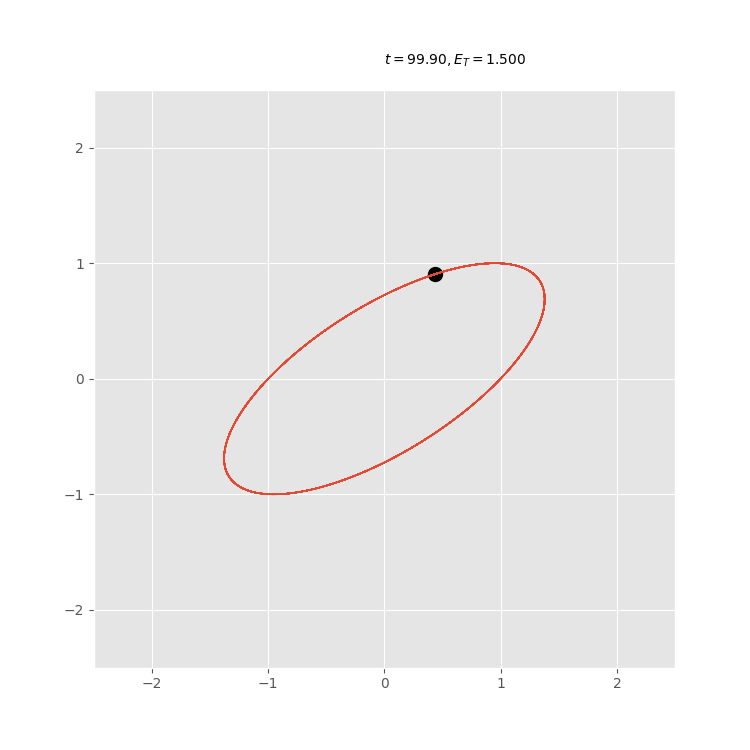

In [3]:
# System parameters
# particle mass, spring & friction constants
m, k, zeta = 1.0, 1.0, 0.0

# Initial condition
R[0], R[1] = 1., 1. # Rx(0), Ry(0)
V[0], V[1] = 1., 0. # Vx(0), Vy(0)
dt = 0.1*np.sqrt(k/m) # set \Delta t

box = 5 # set size of draw area

# set up the figure, axis, and plot element for animatation
fig, ax = plt.subplots(figsize = (7.5,7.5)) # setup plot
ax = plt.axes(xlim=(-box/2, box/2), ylim=(-box/2, box/2)) # draw range
particles, = ax.plot([], [], "ko", ms=10) # setup plot for particle 
line, = ax.plot([], [], lw=1) # setup plot for trajectry
title = ax.text(0.5, 1.05, r"", transform=ax.transAxes, va="center") # title
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=nums, interval=5, blit=True, repeat=False)

Here, we visualize the time evolution of the particle trajectory. The black point represents the position of the particle at the given time. In addition, the entire trajectory of the particle is given by updating the red line at each step. Notice that the particle traces what appears to be a closed orbit.

<div id="results" />

## Simulation results

<div id="temporal" />

### Temporal values of $R_x(t)$, $R_y(t)$, $E_T(t)$ 

Total energy of the harmonic oscillator

$$
E_T(t)=E_{kinetic}(t) + E_{potential}(t) = \frac{1}{2}m\mathbf{V}^2(t)+\frac{1}{2}k\mathbf{R}^2(t)
$$

<IPython.core.display.Javascript object>


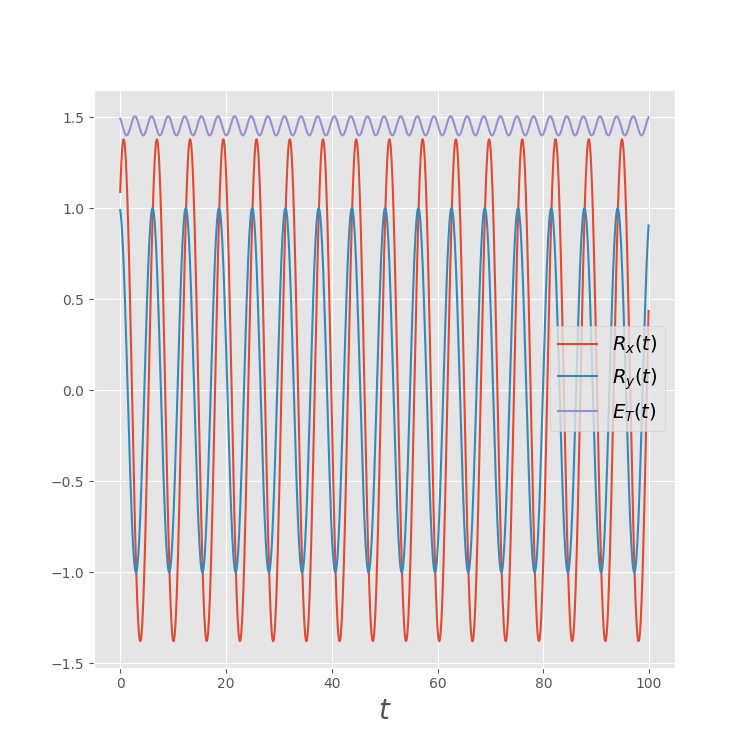

In [4]:
fig, ax = plt.subplots(figsize=(7.5,7.5))
ax.set_xlabel(r"$t$", fontsize=20)
ax.plot(time, Rs[0]) # plot R_x(t)
ax.plot(time, Rs[1]) # plot R_y(t)
ax.plot(time, Et) # plot E(t) (ideally constant if \deta=0)
ax.legend([r"$R_x(t)$",r"$R_y(t)$",r"$E_T(t)$"], fontsize=14)
plt.show()

Let us look in more detail at what is happening to the particle.

For this, we have plotted the $x$ and $y$ positions, as well as the total energy, as a function of time. As expected, the $x$ and $y$ coordinates show oscillatory motion. What is probably more surprising, are the oscillations in the total energy. In this case, we have turned off friction, so ideally the energy of our system should be conserved (as there are no external forces). The oscillations in the energy are an artifact of the approximate solution scheme we have used. To reduce these fluctuations, we can use a smaller time step, or even adopt a higher order integrator (for example the RK4). However, even though the energy is not strictly conserved, notice that there is no notable systematic drift. The energy oscillates around a fixed value. For physical simulations, this is a crucial aspect of a good integrator.

<div id="trajectory" />

### Trajectory plot

<IPython.core.display.Javascript object>


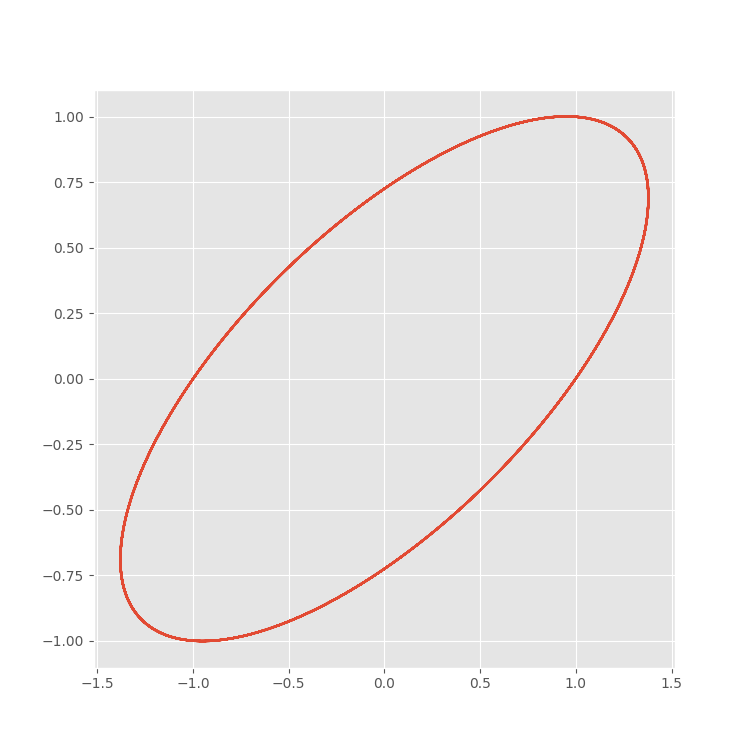

In [5]:
fig, ax = plt.subplots(figsize=(7.5,7.5))
ax.plot(Rs[0, 0:nums],Rs[1, 0:nums]) # parameteric plot Rx(t) vs. Ry(t)
plt.show()

Ideally, the solutions to this harmonic problem in the absence of friction are closed orbits. To check if this is the case, we make a parametric plot of the $x$, $y$ positions of the particle. Indeed, our orbit appears to be a closed one, even though a more careful examination will show a slightly spiraling trajectory.

<div id="extra" />

## Extra

1. Perform the simulation using the Euler method with $m=1$, $k=1$, $\zeta=1$, $\mathbf{R}_0=(1,1)$, and $\mathbf{V}_0=(1.0)$. Then plot 
$E_T(t)$ vs. $t$ and $R_x(t)$ vs. $R_y(t)$.

1. Replace the harmonic spring $\mathbf{F}_{\rm spring}=-k\mathbf{R}$ with an unharmonic spring $\mathbf{F}_{\rm spring}=-kR^2\mathbf{R}$. Then perform a simulation using the same parameters to the previous problem but with $\zeta=0$, and plot $E_T(t)$ vs. $t$ where the total energy of this unharmonic oscillator is given below.

$$
E_T(t)= \frac{1}{2}m\mathbf{V}^2(t)+\frac{1}{4}k\mathbf{R}^4(t)
$$

3. Perform simulations of harmonic spring with $\zeta=0$ using the Runge-Kutta (2nd order) method by modifing the code example for the Euler method. Then plot $E_T(t)$ vs. $t$ and compare it with the result using the Euler method, and summerize the comparison.

4. Perform the same analysis using the Runge-Kutta (4th order) method, and summerize the comparison.

In [6]:
dim = 2    # system dimension (x,y)
nums = 1000 # number of steps
R = np.zeros(dim) # particle position
V = np.zeros(dim) # particle velocity
time = np.zeros(nums) # time (at all steps)

def init(): # initialize animation
    particles.set_data([], [])
    line.set_data([], [])
    title.set_text(r"")
    return particles, line, title

<div id="euler_un" />

### Euler method for unharmonic oscillator

<IPython.core.display.Javascript object>


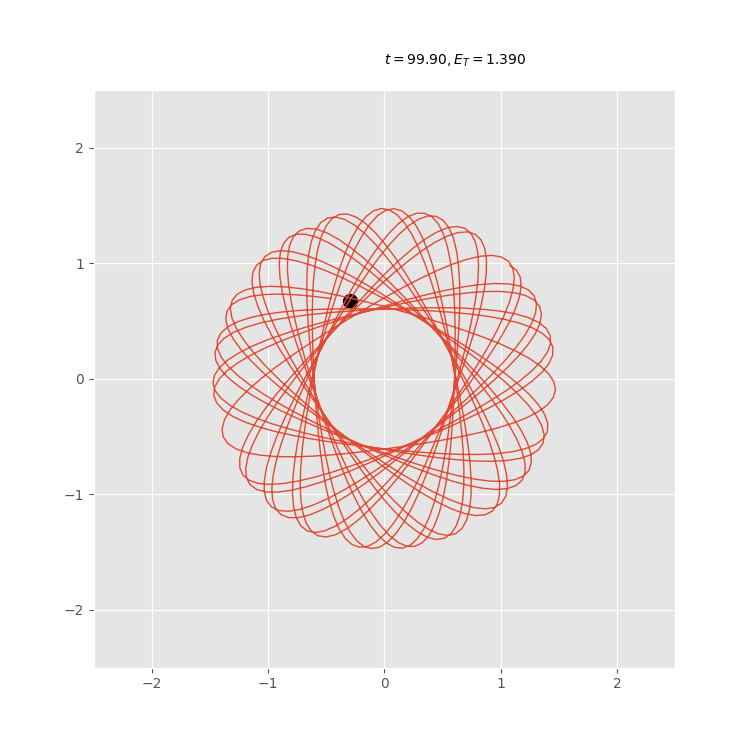

In [7]:
## unharmonic spring
# particle mass, spring & friction constants

m, k, zeta = 1.0, 1.0, 0.0
dt = 0.1*np.sqrt(k/m) # set \Delta t

# Initial condition
R[0], R[1] = 1., 1. # Rx(0), Ry(0)
V[0], V[1] = 1., 0. # Vx(0), Vy(0)
Rs_uh = np.zeros([dim,nums]) # particle position (at all steps)
Vs_uh = np.zeros([dim,nums]) # particle velocity (at all steps)
Et_uh = np.zeros(nums) # total enegy of the system (at all steps)

def animate_uh(i): # define amination
    global R, V, F, Rs_uh, Vs_uh, time, Et_uh
    # Euler method Eqs.(B3) and (B4)
    V = V*(1 - zeta/m*dt) - k/m*dt*np.linalg.norm(R)**2*R
    R = R + V*dt 
    Rs_uh[0:dim, i] = R
    Vs_uh[0:dim, i] = V
    time[i] = i*dt
    Et_uh[i] = 0.5*m*np.linalg.norm(V)**2 + 0.25*k*np.linalg.norm(R)**4
    particles.set_data(R[0], R[1]) # current position
    line.set_data(Rs_uh[0, 0:i], Rs_uh[1, 0:i]) # add latest position Rs
    title.set_text(r"$t = {0:.2f},E_T = {1:.3f}$".format(i*dt, Et_uh[i]))
    return particles, line, title


box = 5 # set size of draw area

# set up the figure, axis, and plot element for animation
fig, ax = plt.subplots(figsize=(7.5,7.5)) # setup plot
ax = plt.axes(xlim=(-box/2, box/2), ylim=(-box/2, box/2)) # draw range
particles, = ax.plot([], [], "ko", ms=10) # setup plot for particle 
line, = ax.plot([], [], lw=1) # setup plot for trajectry
title = ax.text(0.5, 1.05, r"", transform=ax.transAxes, va="center") # title
anim = animation.FuncAnimation(fig, animate_uh, init_func=init, frames=nums, interval=5, blit=True, repeat=False)

<IPython.core.display.Javascript object>


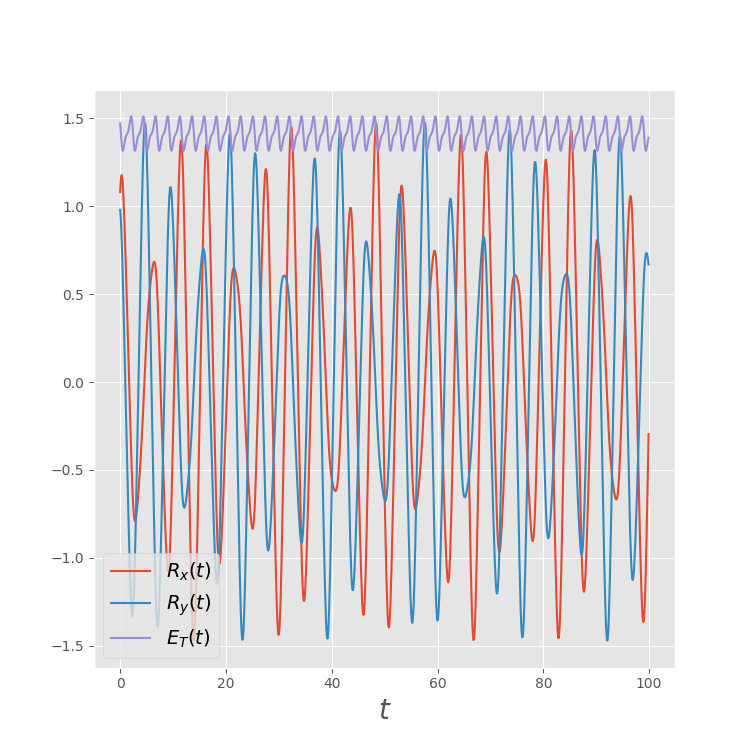

In [8]:
fig, ax = plt.subplots(figsize = (7.5,7.5))
ax.set_xlabel(r"$t$", fontsize = 20)
ax.plot(time,Rs_uh[0]) # plot R_x(t)
ax.plot(time,Rs_uh[1]) # plot R_y(t)
ax.plot(time,Et_uh) # plot E(t) (ideally constant if \deta=0)
ax.legend([r"$R_x(t)$",r"$R_y(t)$",r"$E_T(t)$"], fontsize=14)
plt.show()

<div id="rk2" />

### Runge-Kutta 2nd order harmonic oscillator

<IPython.core.display.Javascript object>


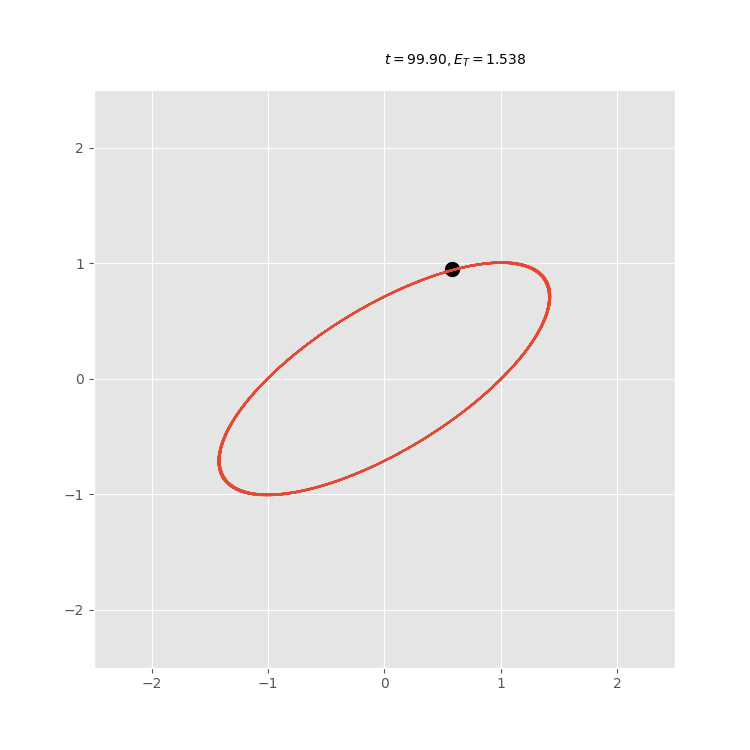

In [9]:
## harmonic spring with RK 2nd order method
# particle mass, spring & friction constants
m, k, zeta = 1.0, 1.0, 0.0
dt = 0.1*np.sqrt(k/m) # set \Delta t

# Initial condition
R[0], R[1] = 1., 1. # Rx(0), Ry(0)
V[0], V[1] = 1., 0. # Vx(0), Vy(0)
R1 = np.zeros(dim) # intermadiate position1
V1 = np.zeros(dim) # intermediate velocity1
Rs_rk2 = np.zeros([dim,nums]) # particle position (at all steps)
Vs_rk2 = np.zeros([dim,nums]) # particle velocity (at all steps)
Et_rk2 = np.zeros(nums) # total enegy of the system (at all steps)

def animate_rk2(i): # define amination
    global R, V, F, Rs_rk2, Vs_rk2, time, Et_rk2
    V1 = V - zeta/m*0.5*dt*V - k/m*0.5*dt*R # RK 2nd
    R1 = R + V*0.5*dt # RK 2nd
    V = V - V1*zeta/m*dt - k/m*dt*R1 # RK 2nd
    R = R + V1*dt # RK 2nd
    Rs_rk2[0:dim, i] = R
    Vs_rk2[0:dim, i] = V
    time[i] = i*dt
    Et_rk2[i] = 0.5*m*np.linalg.norm(V)**2 + 0.5*k*np.linalg.norm(R)**2
    particles.set_data(R[0], R[1]) # current position
    line.set_data(Rs_rk2[0, 0:i], Rs_rk2[1, 0:i]) # add latest position Rs
    title.set_text(r"$t = {0:.2f},E_T = {1:.3f}$".format(i*dt, Et_rk2[i]))
    return particles, line, title

box = 5 # set size of draw area

# set up the figure, axis, and plot element for animation
fig, ax = plt.subplots(figsize=(7.5,7.5)) # setup plot
ax = plt.axes(xlim=(-box/2, box/2), ylim=(-box/2, box/2)) # draw range
particles, = ax.plot([], [], "ko", ms=10) # setup plot for particle 
line, = ax.plot([], [], lw=1) # setup plot for trajectry
title = ax.text(0.5, 1.05, r"", transform=ax.transAxes, va="center") # title
anim = animation.FuncAnimation(fig, animate_rk2, init_func=init, frames=nums, interval=5, blit=True, repeat=False)

<IPython.core.display.Javascript object>


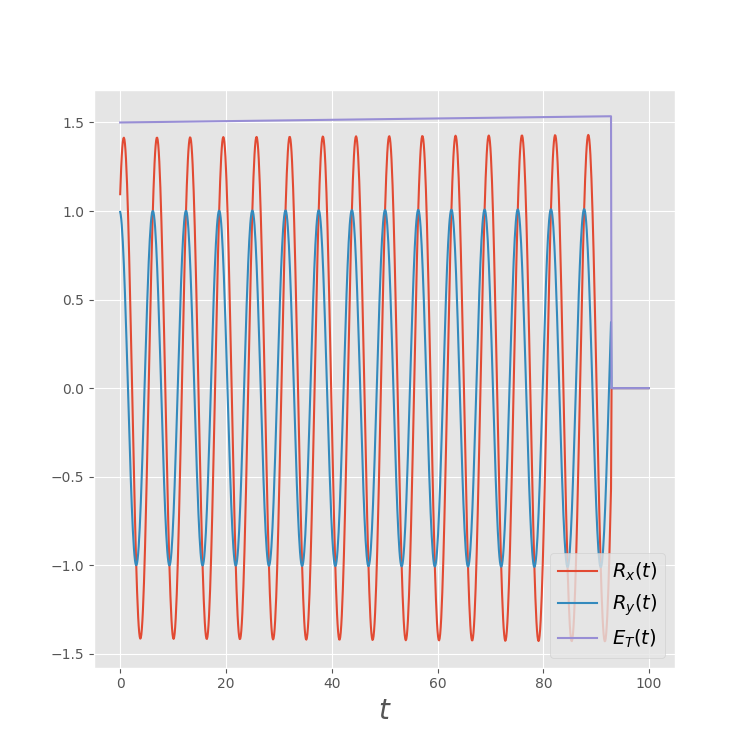

In [10]:
fig, ax = plt.subplots(figsize=(7.5,7.5))
ax.set_xlabel(r"$t$", fontsize=20)
ax.plot(time, Rs_rk2[0]) # plot R_x(t)
ax.plot(time, Rs_rk2[1]) # plot R_y(t)
ax.plot(time, Et_rk2) # plot E(t) (ideally constant if \deta=0)
ax.legend([r"$R_x(t)$",r"$R_y(t)$", r"$E_T(t)$"], fontsize=14)
plt.show()

<div id="rk4" />

### Runge-Kutta 4th order harmonic oscillator

<IPython.core.display.Javascript object>


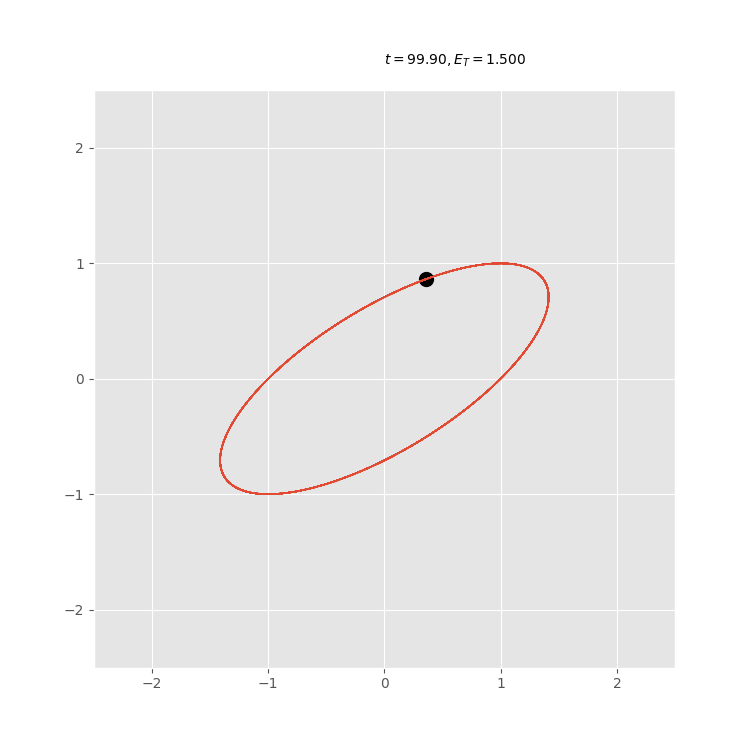

In [11]:
## harmonic spring with RK 4th order method
# particle mass, spring & friction constants
m, k, zeta = 1.0, 1.0, 0.0
dt = 0.1*np.sqrt(k/m) # set \Delta t

# Initial condition
R[0], R[1] = 1., 1. # Rx(0), Ry(0)
V[0], V[1] = 1., 0. # Vx(0), Vy(0)
R1 = np.zeros(dim) # intermadiate position1
V1 = np.zeros(dim) # intermediate velocity1
R2 = np.zeros(dim) # intermadiate position2
V2 = np.zeros(dim) # intermediate velocity2
R3 = np.zeros(dim) # intermadiate position3
V3 = np.zeros(dim) # intermediate velocity3
R4 = np.zeros(dim) # intermadiate position3
V4 = np.zeros(dim) # intermediate velocity3
Rs_rk4 = np.zeros([dim,nums]) # particle position (at all steps)
Vs_rk4 = np.zeros([dim,nums]) # particle velocity (at all steps)
Et_rk4 = np.zeros(nums) # total enegy of the system (at all steps)


def animate_rk4(i):
    global R, V, F, Rs_rk4, Vs_rk4, time, Et_rk4
    V1 = V - zeta/m*0.5*dt*V - k/m*0.5*dt*R # RK 4th
    R1 = R + V*0.5*dt # RK 4th
    V2 = V - zeta/m*0.5*dt*V1 - k/m*0.5*dt*R1 # RK 4th
    R2 = R + V1*0.5*dt # RK 4th
    V3 = V - zeta/m*dt*V2 - k/m*dt*R2 # RK 4th
    R3 = R + V2*dt # RK 4th
    V4 = V - (V+V1*2+V2*2+V3)/6.*zeta/m*dt - k/m*dt*(R+R1*2+R2*2+R3)/6. # Euler method Eq.(B4)
    R4 = R + (V+V1*2+V2*2+V3)/6.*dt 
    R = R4
    V = V4
    Rs_rk4[0:dim, i] = R
    Vs_rk4[0:dim, i] = V
    time[i] = i*dt
    Et_rk4[i] = 0.5*m*np.linalg.norm(V)**2 + 0.5*k*np.linalg.norm(R)**2
    particles.set_data(R[0], R[1]) # current position
    line.set_data(Rs_rk4[0, 0:i], Rs_rk4[1, 0:i]) # add latest position Rs
    title.set_text(r"$t = {0:.2f},E_T = {1:.3f}$".format(i*dt, Et_rk4[i]))
    return particles, line, title

box = 5 # set size of draw area

# set up the figure, axis, and plot element for animation
fig, ax = plt.subplots(figsize=(7.5,7.5)) # setup plot
ax = plt.axes(xlim=(-box/2, box/2), ylim=(-box/2, box/2)) # draw range
particles, = ax.plot([], [], "ko", ms=10) # setup plot for particle 
line, = ax.plot([], [], lw=1) # setup plot for trajectry
title = ax.text(0.5, 1.05, r"", transform=ax.transAxes, va="center") # title
anim = animation.FuncAnimation(fig, animate_rk4, init_func=init, frames=nums, interval=5, blit=True, repeat=False)

<IPython.core.display.Javascript object>


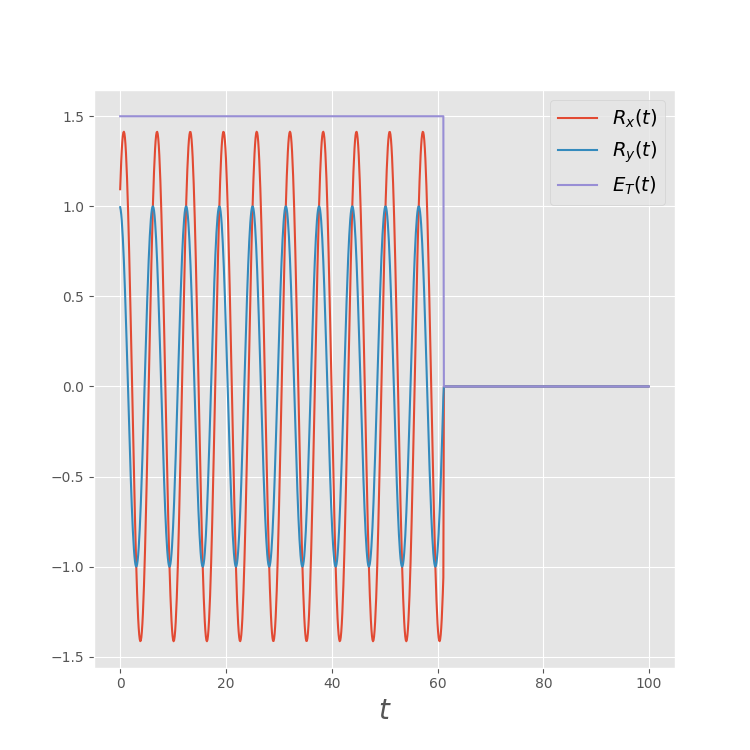

In [12]:
fig, ax = plt.subplots(figsize=(7.5,7.5))
ax.set_xlabel(r"$t$", fontsize=20)
ax.plot(time, Rs_rk4[0]) # plot R_x(t)
ax.plot(time, Rs_rk4[1]) # plot R_y(t)
ax.plot(time, Et_rk4) # plot E(t) (ideally constant if \deta=0)
ax.legend([r"$R_x(t)$",r"$R_y(t)$",r"$E_T(t)$"], fontsize = 14)
plt.show()

<div id="leapfrog" />

### Leap-Frog method for harmonic oscillator

<IPython.core.display.Javascript object>


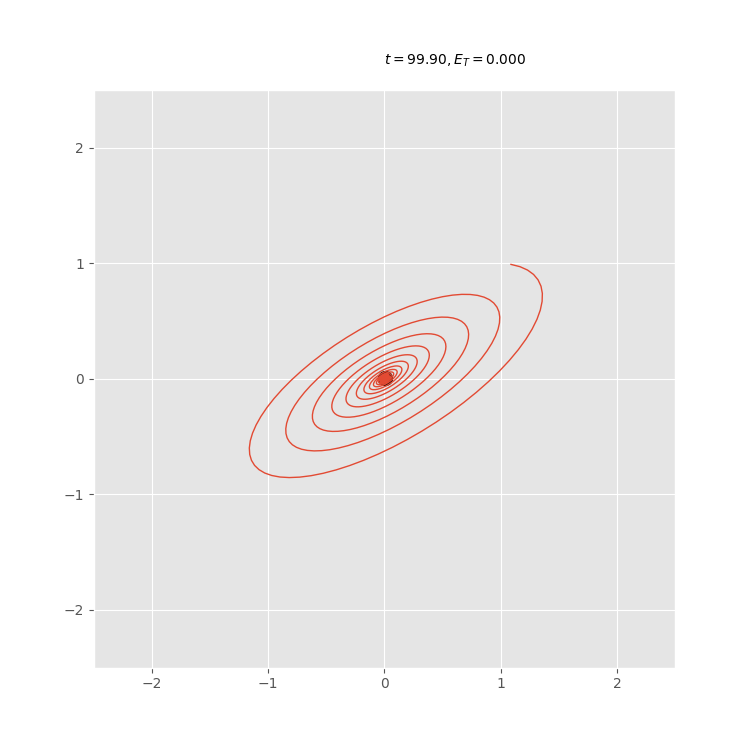

In [13]:
dim = 2    # system dimension (x,y)
nums = 1000 # number of steps
R = np.zeros(dim) # particle position
V = np.zeros(dim) # particle velocity
Rs = np.zeros([dim,nums]) # particle position (at all steps)
Vs = np.zeros([dim,nums]) # particle velocity (at all steps)
Et = np.zeros(nums) # total enegy of the system (at all steps)
time = np.zeros(nums) # time (at all steps)

def init(): # initialize animation
    particles.set_data([], [])
    line.set_data([], [])
    title.set_text(r"")
    return particles, line, title

R1 = np.zeros(dim)
def animate(i): # define amination
    global R, V, F, Rs, Vs, time, Et
    R1 = R
    V = (V*(1 - zeta/2/m*dt) - k/m*dt*R) / (1 + zeta*dt/2/m) # Leap-Frog Eq.(B17)
    R = R + V*dt # Leap-Frog Eq.(B18)
    Rs[0:dim, i] = R
    Vs[0:dim, i] = V
    time[i] = i*dt
    Et[i] = 0.5*m*np.linalg.norm(V)**2 + 0.5*k*np.linalg.norm((R+R1)/2)**2 # Et is evaluated
    particles.set_data(R[0], R[1]) # current position
    line.set_data(Rs[0, 0:i], Rs[1, 0:i]) # add latest position Rs
    title.set_text(r"$t = {0:.2f},E_T = {1:.3f}$".format(i*dt, Et[i]))
    return particles, line, title

# System parameters
# particle mass, spring & friction constants
m, k, zeta = 1.0, 1.0, 0.1

# Initial condition
R[0], R[1] = 1., 1. # Rx(0), Ry(0)
V[0], V[1] = 1., 0. # Vx(0), Vy(0)
dt = 0.1*np.sqrt(k/m) # set \Delta t
box = 5 # set size of draw area

# set up the figure, axis, and plot element for animatation
fig, ax = plt.subplots(figsize=(7.5,7.5)) # setup plot
ax = plt.axes(xlim=(-box/2, box/2), ylim=(-box/2, box/2)) # draw range
particles, = ax.plot([],[], "ko", ms=10) # setup plot for particle 
line, = ax.plot([], [], lw=1) # setup plot for trajectry
title = ax.text(0.5, 1.05, r"", transform=ax.transAxes, va="center") # title
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=nums, interval=5, blit=True, repeat=False)